In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

Визначаємо змінні згідно умови задачі

In [35]:
n_1 = 8000
mu_1 = 13
sigma_1 = 0.5

n_2 = 5000
mu_2 = 12
sigma_2 = 0.7

N = n_1 + n_2

Генерація данних

In [36]:
X = np.zeros(n)
np.random.seed(seed=42)
X[:n_1] = np.random.normal(loc=mu1, scale=sigma1, size=n1)
X[n_1:N] = np.random.normal(loc=mu2, scale=sigma2, size=n2)

y = np.zeros(n)
y[:n_1] = 1
y[n_1:N] = 2

Будуємо гістограму

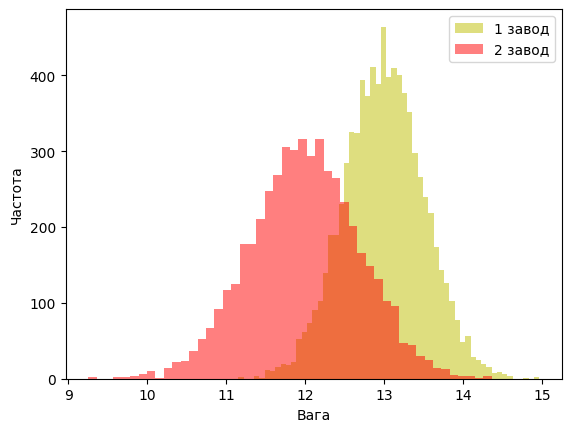

In [37]:
plt.hist(X[y==1], bins='auto', color ='y', alpha=0.5, label='1 завод')
plt.hist(X[y==2], bins='auto', color='r', alpha=0.5, label='2 завод')
plt.xlabel('Вага')
plt.ylabel('Частота')
plt.legend()
plt.show()

Будуємо модель ЕМ алгоритму

In [38]:
gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(X.reshape(-1, 1))

GaussianMixture(n_components=2, random_state=42)

In [39]:
predict = gm.predict(X.reshape(-1, 1)) +1
accuracy = accuracy_score(y, predict)
print(f'Доля правильно визначених виробів: {accuracy:.3f}')

Доля правильно визначених виробів: 0.824


Розрахунок ймовірності приналежності об'єктів на кожному заводі

In [40]:
proba = gm.predict_proba(X.reshape(-1, 1))
proba_1 = proba[:,0]
proba_2 = proba[:,1]

Ймовірність виготвлення деталів на кожному заводі

In [41]:
mean_1 = np.mean(proba_1[y==1])
mean_2 = np.mean(proba_2[y==2])
print(f'Ймовірність виготовлення на 1 заводі: {mean_1:.3f}')
print(f'Ймовірність виготовлдення на 2 заводі: {mean_2:.3f}')

Ймовірність виготовлення на 1 заводі: 0.836
Ймовірність виготовлдення на 2 заводі: 0.650
